In [12]:
import pandas as pd 
import matplotlib.pyplot as plt 
import psycopg2 as pg 
from config import password

In [13]:
conn = pg.connect(f"host=localhost dbname=employees_db user=postgres password={password}")

In [15]:
salary_df = pd.read_sql("SELECT * FROM salary",conn)
salary_df.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


array([[<AxesSubplot:title={'center':'salary'}>]], dtype=object)

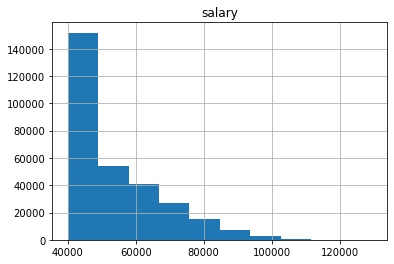

In [23]:
hist_fig = salary_df.hist(column='salary')
hist_fig